<a href="https://colab.research.google.com/github/Abiramit123/Abirami/blob/main/IDPCP%20task%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries 

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [ ]:

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn import svm

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score

In [ ]:
#setting the style
plt.style.use('fivethirtyeight')

Read the dataset

In [ ]:
#Read the file a

In [ ]:
df=pd.read_csv('/content/collegePlace.csv')
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


# Data preparation

In [ ]:
#checking data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [ ]:
#checking null values
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [ ]:
#creating new column
df['CGPA_']=['1-8' if x<=5 else "1-3" if x>5 and x<=6 else '7+' for x in df['CGPA']]
df.head()

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot,CGPA_
0,22,Male,Electronics And Communication,1,8,1,1,7+
1,21,Female,Computer Science,0,7,1,1,7+
2,22,Female,Information Technology,1,6,0,1,1-3
3,21,Male,Information Technology,0,8,1,1,7+
4,22,Male,Mechanical,0,8,0,1,7+


# Removing data

In [ ]:
#Removing Hostel_column
df=df.drop(['Hostel'],axis=1)

In [ ]:
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1
1,21,Female,Computer Science,0,7,1,1
2,22,Female,Information Technology,1,6,0,1
3,21,Male,Information Technology,0,8,1,1
4,22,Male,Mechanical,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0
2962,23,Male,Mechanical,1,7,0,0
2963,22,Male,Information Technology,1,7,0,0
2964,22,Male,Computer Science,1,7,0,0


In [ ]:
#finding the shape of data
df.shape

(2966, 9)

# Handling missing value

In [ ]:
#finding null values
df.isnull().any()

Age                  False
Gender               False
Stream               False
Internships          False
CGPA                 False
Hostel               False
HistoryOfBacklogs    False
PlacedOrNot          False
CGPA_                False
dtype: bool

# Check data distribution

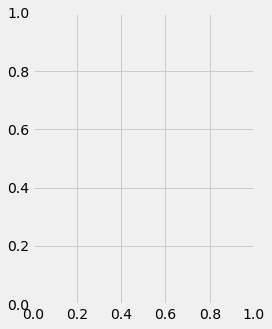

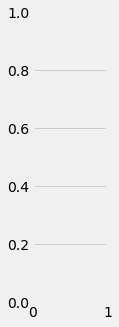

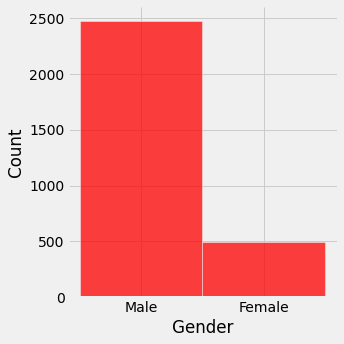

In [ ]:
#check data distribution
plt.figure(figsize=(12,5))
plt.subplot(1,3,3)
sns.displot(df['Stream'],color='b')
plt.subplot(1,3,2)
sns.displot(df['Gender'], color='r')




In [ ]:
#creating dummy dataframe for categorical values
df_cat=df.select_dtypes(include='object')
df_cat.head()

,Gender,Stream
0,Male,Electronics And Communication
1,Female,Computer Science
2,Female,Information Technology
3,Male,Information Technology
4,Male,Mechanical


# Hndling outliers

<Axes: >

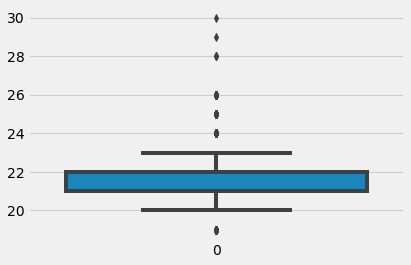

In [ ]:
#handling outliers
sns.boxplot(df['Age'])


In [ ]:
#descriptive analysis
df.describe(include='all')

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966,2966,2966.000000,2966.000000,2966.000000,2966.000000
unique,NaN,2,6,NaN,NaN,NaN,NaN
top,NaN,Male,Computer Science,NaN,NaN,NaN,NaN
freq,NaN,2475,776,NaN,NaN,NaN,NaN
mean,21.485840,NaN,NaN,0.703641,7.073837,0.192178,0.552596
std,1.324933,NaN,NaN,0.740197,0.967748,0.394079,0.497310
min,19.000000,NaN,NaN,0.000000,5.000000,0.000000,0.000000
25%,21.000000,NaN,NaN,0.000000,6.000000,0.000000,0.000000
50%,21.000000,NaN,NaN,1.000000,7.000000,0.000000,1.000000
75%,22.000000,NaN,NaN,1.000000,8.000000,0.000000,1.000000


# Outliers counting

In [ ]:
#finding the count of outliers
#IQR = q3-q1      upperbound=q3+(1.5*IQR), lower bound=q1-(1.5*IQR)
q1 = np.quantile(df['Age'],0.25)
q3 = np.quantile(df['Age'],0.75)
print('Q1 = {}'.format(q1))
print('Q3 = {}'.format(q3))
IQR=q3-q1
print('IQR value is{}'.format(IQR))
upperBound=q3+(1.5*IQR)
lowerBound=q1-(1.5*IQR)
print('the upper bound value is {} & the lower bound value is {}'.format(upperBound,lowerBound))

Q1 = 21.0
Q3 = 22.0
IQR value is1.0
the upper bound value is 23.5 & the lower bound value is 19.5


In [ ]:
#skwed data
print ('skwed data:',len(df[df['Age']>upperBound]))


skwed data: 215


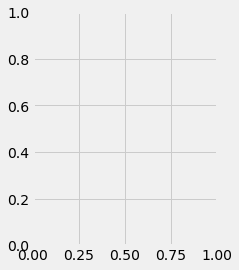

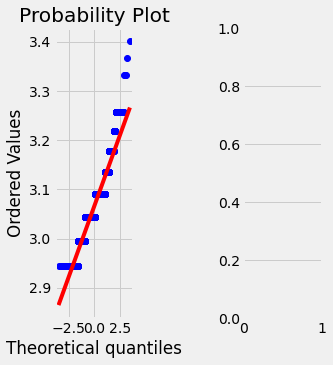

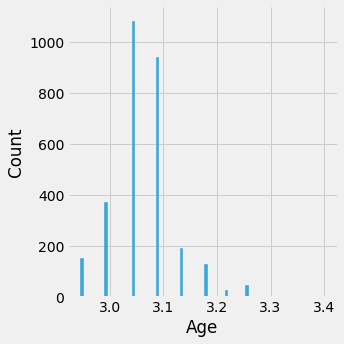

In [ ]:

#handling outline

from scipy import stats
plt.figure(figsize=(10,4))
plt.subplot(1,3,2)
sns.displot(df['Age'])
plt.subplot(1,3,1)
stats.probplot(np.log(df['Age']),plot=plt)
plt.subplot(1,3,3)
sns.displot(np.log(df['Age']))

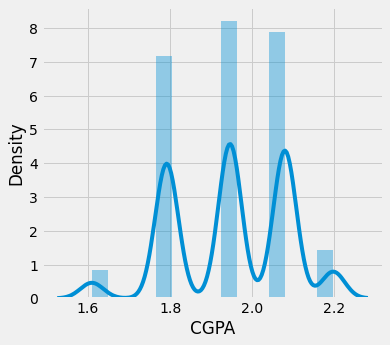

In [ ]:
def transformationplot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)
transformationplot(np.log(df['CGPA']))

# #Handling categorical values

In [ ]:
#handling categorical value
df['Stream']=[0 if x=='Electronics And Communication' else 1 if x=='Computer Science' else  2 if x=='Information Technology' else 3 for x in df['Stream']]

In [ ]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,0,1,8,1,1,1
1,21,Female,1,0,7,1,1,1
2,22,Female,2,1,6,0,0,1
3,21,Male,2,0,8,0,1,1
4,22,Male,3,0,8,1,0,1


In [ ]:
#replace the values

In [ ]:
df['Gender'] = df['Gender'].replace({'Female':0, 'Male':1})

In [ ]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,0,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,2,1,6,0,0,1
3,21,1,2,0,8,0,1,1
4,22,1,3,0,8,1,0,1


In [ ]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,0,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,2,1,6,0,0,1
3,21,1,2,0,8,0,1,1
4,22,1,3,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,1,2,0,7,0,0,0
2962,23,1,3,1,7,1,0,0
2963,22,1,2,1,7,0,0,0
2964,22,1,1,1,7,0,0,0
